### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import cv2
import random
import tensorflow as tf
import seaborn as sns
import glob 
import skimage as oi
from tensorflow import keras
from tensorflow.math import confusion_matrix
from sklearn.metrics import classification_report
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, LeakyReLU
import warnings
warnings.filterwarnings("ignore")

In [2]:
np.random.seed(42)

### Extracting Data 

In [3]:
import zipfile
import os

# Define the path to the zip file and the extraction directory
zip_file_path = 'data for hand gesture recognition/archive (1).zip'
extraction_dir = 'Extracted data for hand gesture recognition'

# Create the extraction directory if it doesn't exist
os.makedirs(extraction_dir, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

print(f"Files extracted to {extraction_dir}")


Files extracted to Extracted data for hand gesture recognition


### Loading Data

In [4]:
import os
import cv2
import numpy as np

# Define the extraction directory
extraction_dir = 'Extracted data for hand gesture recognition/HandGesture/images'

# Initialize lists to store images and labels
images = []
labels = []

# Define a mapping from folder names to numerical labels
label_mapping = {
    'call_me': 0,
    'fingers_crossed': 1,
    'okay': 2,
    'paper': 3,
    'peace': 4,
    'rock': 5,
    'rock_on': 6,
    'scissor': 7,
    'thumbs': 8,
    'up': 9
}

# Loop through the sub-folders in the images folder and load the images
for folder_name in os.listdir(extraction_dir):
    folder_path = os.path.join(extraction_dir, folder_name)
    if os.path.isdir(folder_path):
        print(f"Contents of folder {folder_name}:", os.listdir(folder_path))
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, (64, 64))
                images.append(img)
                labels.append(label_mapping[folder_name])  # Use the label mapping

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Check the shape of the images and labels arrays
print(f"Shape of images array: {images.shape}")
print(f"Shape of labels array: {labels.shape}")


Contents of folder call_me: ['1055.jpg', '1070.jpg', '1086.jpg', '1101.jpg', '1115.jpg', '1129.jpg', '1151.jpg', '1186.jpg', '1233.jpg', '1245.jpg', '1281.jpg', '1293.jpg', '1303.jpg', '1314.jpg', '1327.jpg', '1581.jpg', '1591.jpg', '1603.jpg', '1613.jpg', '1624.jpg', '1634.jpg', '1643.jpg', '1654.jpg', '1671.jpg', '1682.jpg', '1700.jpg', '1711.jpg', '1721.jpg', '1729.jpg', '1737.jpg', '1746.jpg', '1753.jpg', '1760.jpg', '1767.jpg', '1775.jpg', '1782.jpg', '1790.jpg', '1798.jpg', '1803.jpg', '1810.jpg', '1815.jpg', '1819.jpg', '1826.jpg', '1831.jpg', '1837.jpg', '1843.jpg', '1849.jpg', '1856.jpg', '1862.jpg', '1870.jpg', '1877.jpg', '1884.jpg', '1891.jpg', '1899.jpg', '1906.jpg', '1913.jpg', '1921.jpg', '1930.jpg', '1941.jpg', '1948.jpg', '1957.jpg', '1964.jpg', '1972.jpg', '1978.jpg', '1986.jpg', '1993.jpg', '2000.jpg', '2018.jpg', '2026.jpg', '2055.jpg', '2062.jpg', '2068.jpg', '2076.jpg', '2084.jpg', '2167.jpg', '2177.jpg', '2184.jpg', '2195.jpg', '2202.jpg', '2210.jpg', '2217.jpg',

In [5]:
images[:5]

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ..

In [6]:
images.shape

(5243, 64, 64)

- **images array** now contains all the images from both the Test and Train folders. 
- Its shape is (8400, 64, 64) which indicates that you have a total of 8400 images, each resized to 64x64 pixels.

### Data Augmentation

- The .fit() method expects the input array to have a rank of 4, but our array has a shape of (8400, 64, 64, 1, 1).
- We can fix this by reshaping your array to remove the extra dimension

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Reshape the images array to have a single channel
images = images.reshape((images.shape[0], images.shape[1], images.shape[2], 1))

# Check the shape of the images array
print(f"Shape of images array after reshaping: {images.shape}")

# Define the ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the ImageDataGenerator to the images
datagen.fit(images)


Shape of images array after reshaping: (5243, 64, 64, 1)


### Numerical Operations

##### Calculating Mean and Standard Deviation

In [8]:
mean_pixel_value = np.mean(images)
std_pixel_value = np.std(images)

print(f"Mean Pixel Value: {mean_pixel_value}")
print(f"Standard Deviation of Pixel Values: {std_pixel_value}")

Mean Pixel Value: 58.523973324179266
Standard Deviation of Pixel Values: 106.39146512166239


##### Normalization 

In [9]:
images_normalized = images / 255.0

##### Flatten the images

In [10]:
images_flattened = images.reshape(images.shape[0], -1)
print(f"Shape of Flattened Images: {images_flattened.shape}")

Shape of Flattened Images: (5243, 4096)


### Data Visualization

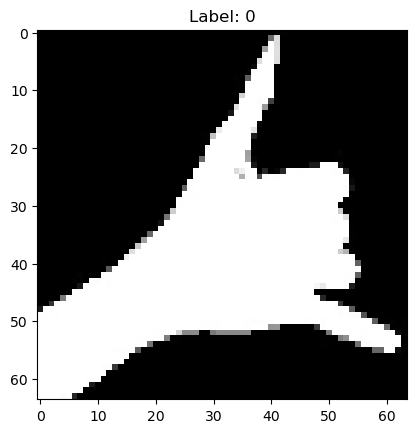

In [11]:
import matplotlib.pyplot as plt

# Visualize the first image in the dataset
plt.imshow(images[1].reshape(64, 64), cmap='gray')
plt.title(f"Label: {labels[4]}")
plt.show();


####  To print only the first image shape for each sub-folder

In [12]:
# Define the extraction directory
extraction_dir = 'Extracted data for hand gesture recognition/HandGesture/images'

# Loop through the sub-folders in the images folder and print the shape of the first image
for folder_name in os.listdir(extraction_dir):
    folder_path = os.path.join(extraction_dir, folder_name)
    if os.path.isdir(folder_path):
        print('Class', folder_name)
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            img_array = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            if img_array is not None:
                print("Image shape:", img_array.shape, "\n")
            break  


Class call_me
Image shape: (195, 240) 

Class fingers_crossed
Image shape: (195, 240) 

Class okay
Image shape: (195, 240) 

Class paper
Image shape: (195, 240) 

Class peace
Image shape: (195, 240) 

Class rock
Image shape: (195, 240) 

Class rock_on
Image shape: (195, 240) 

Class scissor
Image shape: (195, 240) 

Class thumbs
Image shape: (195, 240) 

Class up
Image shape: (195, 240) 



#### Checking Sizes of images 

In [13]:
# Define the extraction directory
extraction_dir = 'Extracted data for hand gesture recognition/HandGesture/images'

def check_image_sizes():
    first_img_shape = None
    for folder_name in os.listdir(extraction_dir):
        folder_path = os.path.join(extraction_dir, folder_name)
        if os.path.isdir(folder_path):
            for file_name in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file_name)
                img_array = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                if img_array is None:
                    continue
                if first_img_shape is None:
                    first_img_shape = img_array.shape
                elif img_array.shape != first_img_shape:
                    print("Image sizes are not consistent.")
                    return False
    print("All images have the same size:", first_img_shape)
    return True

check_image_sizes()


All images have the same size: (195, 240)


True

#### Shuffling Data

In [14]:
# Reshape the images array to have a single channel
images = images.reshape((images.shape[0], images.shape[1], images.shape[2], 1))

# Shuffle the training data
training_data = list(zip(images, labels))
np.random.shuffle(training_data)


### Data Preprocessing

In [15]:
# Feature selection
X = []
y = []

for feature, label in training_data:
    X.append(feature)
    y.append(label)

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Check the shape of the feature and label arrays
print(f"Shape of X array: {X.shape}")
print(f"Shape of y array: {y.shape}")


Shape of X array: (5243, 64, 64, 1)
Shape of y array: (5243,)


In [16]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


##### Converting it into numpy arrays

In [17]:
X=np.array(X)
y=np.array(y)
print(X.shape)
print(y.shape)

(5243, 64, 64, 1)
(5243,)


##### Splitting the Data

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4194, 64, 64, 1)
(4194,)
(1049, 64, 64, 1)
(1049,)


In [19]:
#Getting Class Names
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


#### Scaling the Data 

In [20]:
X_train = X_train/255
X_test = X_test/255

In [21]:
#After scaling
print(X_train[2])

[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]


### Modelling Time

**Building Multi-Neural Network**

**Compiling The Model**

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, LeakyReLU

model = Sequential([
    Input(shape=(64, 64, 1)),
    Flatten(),
    #Dense(1024),
    #LeakyReLU(negative_slope=0.1),
    #Dense(512),
    #LeakyReLU(negative_slope=0.1),
    #Dense(256),
    #LeakyReLU(negative_slope=0.1),
    #Dense(128),
    #LeakyReLU(negative_slope=0.1),
    #Dense(64),
    #LeakyReLU(negative_slope=0.1),
    Dense(32),
    LeakyReLU(negative_slope=0.1),
    Dense(16),
    LeakyReLU(negative_slope=0.1),
    Dense(10, activation='softmax')
])


- Commenting the layers/parameters and simplifying the model reduced the risk of overfitting and helped it generalize better to new data, leading to more accurate predictions.

In [23]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#'adam'optimizer - Combines the advantages of two other extensions of stochastic gradient descent (SGD), namely AdaGrad and RMSProp

**Training the model**

In [24]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=32, verbose=2)

Epoch 1/10
118/118 - 3s - 25ms/step - accuracy: 0.3646 - loss: 1.7566 - val_accuracy: 0.4667 - val_loss: 1.4632
Epoch 2/10
118/118 - 1s - 6ms/step - accuracy: 0.6131 - loss: 1.1523 - val_accuracy: 0.6452 - val_loss: 1.1336
Epoch 3/10
118/118 - 1s - 6ms/step - accuracy: 0.7300 - loss: 0.8406 - val_accuracy: 0.6881 - val_loss: 0.9323
Epoch 4/10
118/118 - 1s - 6ms/step - accuracy: 0.8039 - loss: 0.6476 - val_accuracy: 0.7310 - val_loss: 0.8274
Epoch 5/10
118/118 - 1s - 6ms/step - accuracy: 0.8434 - loss: 0.5199 - val_accuracy: 0.7429 - val_loss: 0.8191
Epoch 6/10
118/118 - 1s - 6ms/step - accuracy: 0.8805 - loss: 0.4157 - val_accuracy: 0.7714 - val_loss: 0.7906
Epoch 7/10
118/118 - 1s - 6ms/step - accuracy: 0.9065 - loss: 0.3331 - val_accuracy: 0.7833 - val_loss: 0.7396
Epoch 8/10
118/118 - 1s - 6ms/step - accuracy: 0.9197 - loss: 0.2852 - val_accuracy: 0.7595 - val_loss: 0.7731
Epoch 9/10
118/118 - 1s - 6ms/step - accuracy: 0.9396 - loss: 0.2301 - val_accuracy: 0.7690 - val_loss: 0.7829


In [25]:
#Summary of model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         131,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 395,408 (1.51 MB)

 Trainable params: 131,802 (514.85 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 263,606 (1.01 MB)

### Evaluation Time

**Training Loss**

In [26]:
loss, accuracy = model.evaluate(X_train, y_train)
print(f"Training Loss: {loss:.4f}")
print(f"Training Accuracy: {accuracy*100:.2f}%")

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9648 - loss: 0.1566
Training Loss: 0.2065
Training Accuracy: 94.90%


**Testing Loss**

In [27]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Testing Loss: {loss:.4f}")
print(f"Testing Accuracy : {accuracy*100:.2f} %")

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8180 - loss: 0.6346
Testing Loss: 0.6678
Testing Accuracy : 80.08 %


#### Model Evaluating with Visualization 

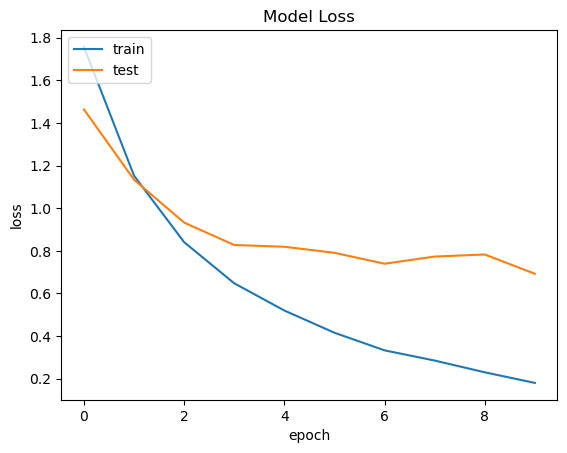

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show();

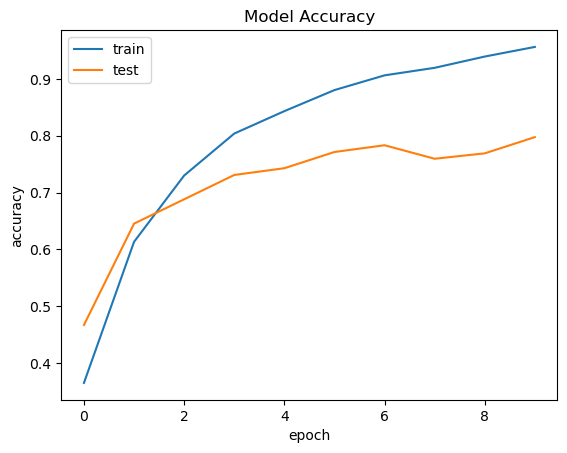

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show();

### Predictions 

In [30]:
y_pred=model.predict(X_test)
print(y_pred[0])

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
[1.9468614e-04 2.3117160e-07 2.9665150e-04 2.3055172e-03 1.7870715e-03
 9.9233717e-01 2.5515306e-05 2.9260956e-03 8.5657128e-05 4.1367399e-05]


In [31]:
y_pred = [np.argmax(i) for i in y_pred]
print(y_pred[4])

7


**Comparison b/w y_test and y_pred**

In [32]:
comparison_df = pd.DataFrame({ 'Actual': y_test,'Predicted': y_pred})

print(comparison_df[:20])

    Actual  Predicted
0        5          5
1        9          9
2        2          2
3        9          9
4        7          7
5        1          1
6        3          3
7        5          5
8        4          4
9        5          5
10       6          6
11       0          0
12       8          8
13       8          8
14       7          7
15       9          9
16       9          9
17       1          1
18       7          7
19       8          7


### Confusion Matrix

In [33]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

tf.Tensor(
[[ 82   0   1   1   0   3   0   2   1   0]
 [  0  75   0   0   3   0   2   1   2   6]
 [  0   0  94   1   1   7   0   1   0   0]
 [  0   2  27  46  10   5   0   2   1   2]
 [  0   6   0   5  78   0   5  10   0   1]
 [  0   1   4   0   2  95   0   3   1   0]
 [  0   2   1   1  11   0 100   2   0   0]
 [  5   8   3   5   8   3   0  71   3   2]
 [  9   1   0   0   0   2   0   8  90   0]
 [  1   6   2   1   3   3   0   0   0 109]], shape=(10, 10), dtype=int32)


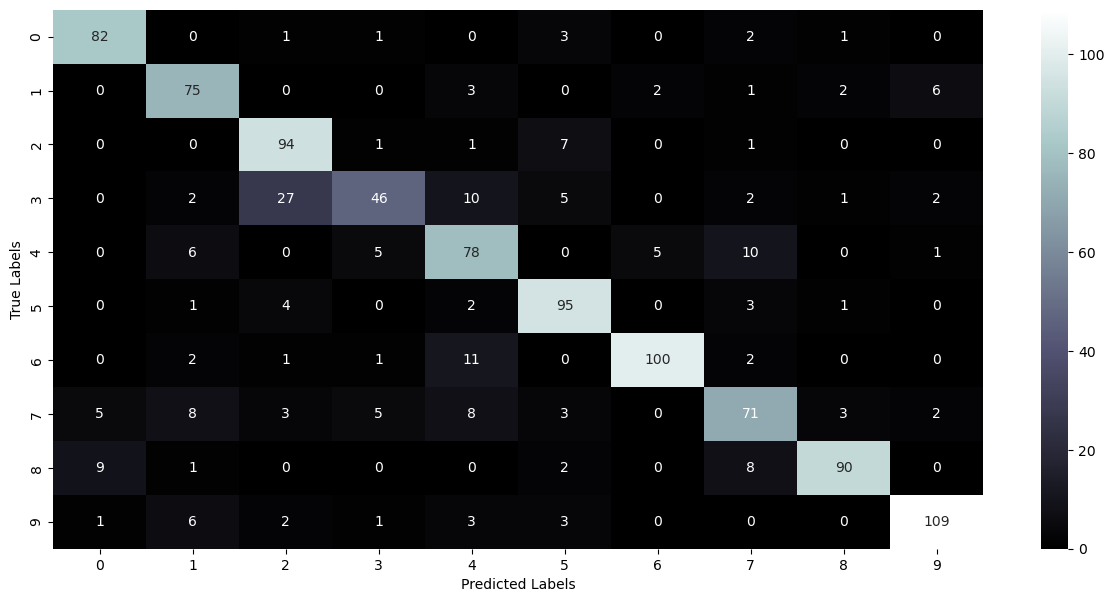

In [34]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='bone')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show();

#### Classification Report

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        90
           1       0.74      0.84      0.79        89
           2       0.71      0.90      0.80       104
           3       0.77      0.48      0.59        95
           4       0.67      0.74      0.71       105
           5       0.81      0.90      0.85       106
           6       0.93      0.85      0.89       117
           7       0.71      0.66      0.68       108
           8       0.92      0.82      0.87       110
           9       0.91      0.87      0.89       125

    accuracy                           0.80      1049
   macro avg       0.80      0.80      0.79      1049
weighted avg       0.81      0.80      0.80      1049



33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8180 - loss: 0.6346
Test Loss: 0.6678
Test Accuracy: 80.08%
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


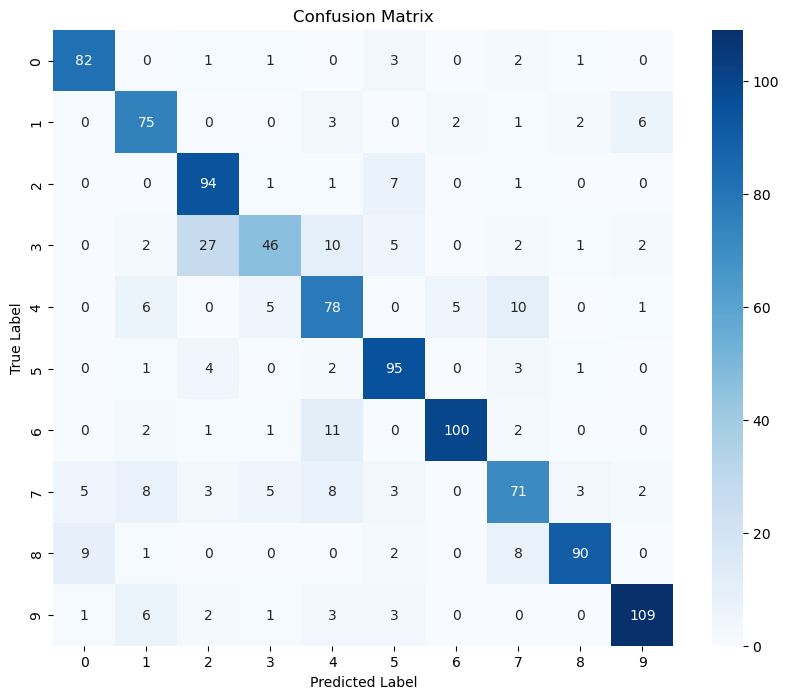

In [36]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()